In [1]:
import pandas as pd
import numpy as np

C:\Users\yusuf\AppData\Local\Temp\ipykernel_26812\2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Load the Excel file into a DataFrame
#csv_path = "priceData_last100000rows.csv"
#data = pd.read_csv(csv_path, sep = ";")

# Display the first few rows of the dataframe to understand its structure
#data.head()

ModuleNotFoundError: No module named 'seaborn'

In [4]:
# DATABASE BAĞLANTI 

from sqlalchemy import create_engine

user = 'lydiausr'
password = 'lydia2024!'
host = '10.255.0.230'
port = '5432'
db = 'lydia'
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{db}"
engine = create_engine(connection_string)



In [9]:
pip install pyarrow

     ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/24.8 MB 1.3 MB/s eta 0:00:20
     ---------------------------------------- 0.0/24.8 MB 1.3 MB/s eta 0:00:20
     --------------------------------------- 0.1/24.8 MB 409.6 kB/s eta 0:01:01
     --------------------------------------- 0.1/24.8 MB 459.5 kB/s eta 0:00:54
     --------------------------------------- 0.1/24.8 MB 467.6 kB/s eta 0:00:53
     --------------------------------------- 0.1/24.8 MB 479.3 kB/s eta 0:00:52
     --------------------------------------- 0.2/24.8 MB 588.9 kB/s eta 0:00:42
     --------------------------------------- 0.2/24.8 MB 540.4 kB/s eta 0:00:46
     --------------------------------------- 0.2/24.8 MB 580.1 kB/s eta 0:00:43
     --------------------------------------- 0.3/24.8 MB 630.9 kB/s eta 0:00:39
      -------------------------------------- 0.3/24.8 MB 634.9 kB/s eta 0:00:39
      -------------------------------------- 0.3/2


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
pip install -U connectorx



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import connectorx as cx
# columns_to_drop = ['screenroute', 'addedtodownloadqueue', 'enddownload', 'flightno','recordroute','begdownload', 'recordroute', 'flightno', 'arrtime', 'flightminutes']
# query ="SELECT * FROM airo.daily_price WHERE deptime > '2024-01-01 00:00:00' AND begdownload >= '2024-01-05'"
# data_new = cx.read_sql(connection_string, query)
query_short = "SELECT classavailable, deptime, arrtime, brand, price FROM airo.daily_price WHERE deptime > '2024-01-01 00:00:00' AND begdownload >= '2024-01-05'"
data_new = cx.read_sql(connection_string, query_short)

In [6]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
from pathlib import Path

user = 'lydiausr'
password = 'lydia2024!'
host = '10.255.0.230'
port = '5432'
db = 'lydia'
connection_string = f"postgresql://{user}:{password}@{host}:{port}/{db}"
engine = create_engine(connection_string)
conn = engine.connect().execution_options(
        stream_results=True)
# query = "SELECT classavailable, deptime, arrtime, brand, price FROM airo.daily_price"
offset = 0
chunksize = 1_000_000
query = f'select classavailable, deptime, arrtime, brand, price FROM airo.daily_price LIMIT {chunksize} OFFSET {offset}'
count = 0
folder_path = f'{Path.home()}\\airo\\data'
# iterator = iter(pd.read_sql_query(query , conn, parse_dates = ['deptime', 'arrtime'], dtype={'price': np.int32}, chunksize=2000000))
# for chunk_dataframe in pd.read_sql_query(query , conn, parse_dates = ['deptime', 'arrtime'], dtype={'price': np.int32}, chunksize=5000000):
# for chunk_dataframe in pd.read_sql_query(query , conn, parse_dates = ['deptime', 'arrtime'], dtype={'price': np.int32}):
for i in range(560000000//chunksize):
        data = pd.read_sql_query(query , conn, parse_dates = ['deptime', 'arrtime'], dtype={'price': np.int32})
        file_path = folder_path + '/part%s.pkl' % (count)
        data.to_pickle(file_path)
        print(f'{file_path} has been written with offset:{offset} with chunksize: {chunksize}')
        count += 1
        offset += chunksize
        query = f'select classavailable, deptime, arrtime, brand, price FROM airo.daily_price LIMIT {chunksize} OFFSET {offset}'

C:\Users\yusuf\airo\data/part0.pkl has been written with offset:0 with chunksize: 10
C:\Users\yusuf\airo\data/part1.pkl has been written with offset:10 with chunksize: 10
C:\Users\yusuf\airo\data/part2.pkl has been written with offset:20 with chunksize: 10
C:\Users\yusuf\airo\data/part3.pkl has been written with offset:30 with chunksize: 10
C:\Users\yusuf\airo\data/part4.pkl has been written with offset:40 with chunksize: 10


KeyboardInterrupt: 

In [5]:
from pathlib import Path
home = str(Path.home())
print(f'{Path.home()}\\airo\\data')

C:\Users\yusuf\airo\data


In [13]:
#SQL SELECT
query = "SELECT classavailable, deptime, arrtime, brand, price FROM airo.daily_price"
# query = "SELECT classavailable, deptime, arrtime, brand, price FROM airo.daily_price WHERE deptime > '2024-01-01 00:00:00' AND begdownload >= '2024-01-05'"

# data = pd.read_sql_query(query, engine, dtype={'classavailable': np.str_, 'deptime': np.datetime64 , 'arrtime': np.datetime64, 'brand': np.str_, 'price': np.int64})
# data = pd.read_sql_query(query, engine, parse_dates = ['deptime', 'arrtime'], dtype={'price': np.int32})
count = 0
folder_path = r'C:\Users\luchy\Desktop\airo\data'
iterator = pd.read_sql_query(query , engine, parse_dates = ['deptime', 'arrtime'], dtype={'price': np.int32}, chunksize=2000000)
for chunk in iterator:
    file_path = folder_path + '/part%s.pkl' % (count)
    chunk.to_pickle(file_path)
    count += 1

In [11]:
count

2

In [ ]:
data.to_pickle("./dummy.pkl")

In [9]:
#SQL SELECT
query ="SELECT * FROM airo.daily_price WHERE deptime > '2024-01-01 00:00:00' AND begdownload >= '2024-01-05';"
data = pd.read_sql(query, engine)

data.head()

,screenroute,addedtodownloadqueue,begdownload,enddownload,recordroute,flightno,classavailable,deptime,arrtime,flightminutes,brand,price
0,LEDMOW0701,2024-01-04 22:29:00.477000000,2024-01-05 00:04:27.207000000,2024-01-05 00:04:34.990000000,LEDMOW0701,U6-80,M9,2024-01-07 18:15:00,2024-01-07 19:50:00,95,PR,6055
1,MOWMRV0701,2024-01-04 22:26:01.150000000,2024-01-05 00:03:03.693000000,2024-01-05 00:03:13.613000000,MOWMRV0701,U6-1367,A9,2024-01-07 10:00:00,2024-01-07 13:05:00,185,PR,5538
2,MOWOMS0701,2024-01-04 22:32:01.040000000,2024-01-05 00:04:46.653000000,2024-01-05 00:04:49.183000000,MOWOMS0701,U6-387,M9,2024-01-07 23:10:00,2024-01-08 05:30:00,200,PR,14946
3,LEDMOW0701,2024-01-04 22:29:00.477000000,2024-01-05 00:04:27.207000000,2024-01-05 00:04:34.990000000,LEDMOW0701,WZ-108,T9,2024-01-07 17:30:00,2024-01-07 19:00:00,90,ËÀÉÒ,5849
4,KJAMOW0701,2024-01-04 22:59:00.850000000,2024-01-05 00:05:27.237000000,2024-01-05 00:05:31.360000000,KJAMOW0701,ÔË-382,Î9,2024-01-07 19:55:00,2024-01-07 20:55:00,300,PR,14970


In [31]:
data_new.dtypes

classavailable    object
deptime           object
arrtime           object
brand             object
price             object
dtype: object

In [8]:
data['begdownload'] = pd.to_datetime(data['begdownload'], errors='coerce', infer_datetime_format=True)

In [6]:
data["deptime"]=pd.to_datetime(data["deptime"])

In [11]:
#Flight no ve org/dest kolonlarının oluşturulması 
data['Prefix'] = data['flightno'].str.slice(0, 2)  # Gets the first 2 character
data['Number'] = data['flightno'].str.slice(3)     # Gets the rest of the characters from the second character onwards
data['Org'] = data['recordroute'].str.slice(0,3)
data['Dest'] = data['recordroute'].str.slice(3,6)
data['ond'] = data['Org'] +'-'+ data['Dest']

# Show the result
data.head()

,screenroute,addedtodownloadqueue,begdownload,enddownload,recordroute,flightno,classavailable,deptime,arrtime,flightminutes,brand,price,dep_date,dep_time,Prefix,Number,Org,Dest,ond
0,MOWMRV0701,2024-01-04 22:26:01.150000000,2024-01-05 00:03:03.693,2024-01-05 00:03:13.613000000,MOWMRV0701,Y7-1021,O9,2024-01-07 11:10:00,2024-01-07 14:45:00,215,ËÀÉÒ,4886,2024-01-07,11:10:00,Y7,1021,MOW,MRV,MOW-MRV
1,LEDKJA0701,2024-01-04 22:47:00.410000000,2024-01-05 00:05:06.410,2024-01-05 00:05:10.540000000,LEDKJA0701,Y7-302,B9,2024-01-07 21:00:00,2024-01-08 06:00:00,300,ËÀÉÒ,12973,2024-01-07,21:00:00,Y7,302,LED,KJA,LED-KJA
2,MOWOMS0701,2024-01-04 22:32:01.040000000,2024-01-05 00:04:46.653,2024-01-05 00:04:49.183000000,MOWOMS0701,U6-387,H9,2024-01-07 23:10:00,2024-01-08 05:30:00,200,PR,16486,2024-01-07,23:10:00,U6,387,MOW,OMS,MOW-OMS
3,MOWEVN0701,2024-01-04 22:26:01.150000000,2024-01-05 00:04:04.570,2024-01-05 00:04:10.537000000,MOWEVN0701,WZ-4323,E8,2024-01-07 20:40:00,2024-01-08 01:10:00,210,ËÀÉÒ,14865,2024-01-07,20:40:00,WZ,4323,MOW,EVN,MOW-EVN
4,UFAMOW0701,2024-01-04 22:29:00.477000000,2024-01-05 00:04:13.493,2024-01-05 00:04:17.493000000,UFAMOW0701,WZ-464,Y9,2024-01-07 04:55:00,2024-01-07 05:20:00,145,ÑÒÀÍÄÀÐÒ,23635,2024-01-07,04:55:00,WZ,464,UFA,MOW,UFA-MOW


In [12]:
data["dep_date"]= data["deptime"].dt.date
data["dep_time"]= data["deptime"].dt.time

In [13]:
data.head()

,screenroute,addedtodownloadqueue,begdownload,enddownload,recordroute,flightno,classavailable,deptime,arrtime,flightminutes,brand,price,dep_date,dep_time,Prefix,Number,Org,Dest,ond
0,MOWMRV0701,2024-01-04 22:26:01.150000000,2024-01-05 00:03:03.693,2024-01-05 00:03:13.613000000,MOWMRV0701,Y7-1021,O9,2024-01-07 11:10:00,2024-01-07 14:45:00,215,ËÀÉÒ,4886,2024-01-07,11:10:00,Y7,1021,MOW,MRV,MOW-MRV
1,LEDKJA0701,2024-01-04 22:47:00.410000000,2024-01-05 00:05:06.410,2024-01-05 00:05:10.540000000,LEDKJA0701,Y7-302,B9,2024-01-07 21:00:00,2024-01-08 06:00:00,300,ËÀÉÒ,12973,2024-01-07,21:00:00,Y7,302,LED,KJA,LED-KJA
2,MOWOMS0701,2024-01-04 22:32:01.040000000,2024-01-05 00:04:46.653,2024-01-05 00:04:49.183000000,MOWOMS0701,U6-387,H9,2024-01-07 23:10:00,2024-01-08 05:30:00,200,PR,16486,2024-01-07,23:10:00,U6,387,MOW,OMS,MOW-OMS
3,MOWEVN0701,2024-01-04 22:26:01.150000000,2024-01-05 00:04:04.570,2024-01-05 00:04:10.537000000,MOWEVN0701,WZ-4323,E8,2024-01-07 20:40:00,2024-01-08 01:10:00,210,ËÀÉÒ,14865,2024-01-07,20:40:00,WZ,4323,MOW,EVN,MOW-EVN
4,UFAMOW0701,2024-01-04 22:29:00.477000000,2024-01-05 00:04:13.493,2024-01-05 00:04:17.493000000,UFAMOW0701,WZ-464,Y9,2024-01-07 04:55:00,2024-01-07 05:20:00,145,ÑÒÀÍÄÀÐÒ,23635,2024-01-07,04:55:00,WZ,464,UFA,MOW,UFA-MOW


In [ ]:
from datetime import timedelta

# 'Etiket' kolonunu oluşturma ve varsayılan olarak 'other' ile doldurma
data['Etiket'] = 'other'

# Havayolu A'nın uçuş zamanlarını ve ilgili diğer detayları al
havayolu_a = data[data['Prefix'] == 'N4']

# Her bir Havayolu A uçuşu için, diğer hava yollarının uçuşlarını karşılaştırma
for index, row in havayolu_a.iterrows():
    uçuş_zamanı = row['deptime']
    kalkış_noktası = row['Org']
    varış_noktası = row['Dest']

    # Havayolu A'nın kalkış zamanına ±3 saat içinde olan uçuşları bul
    mask = (data['Org'] == kalkış_noktası) & (data['Dest'] == varış_noktası) & \
           (data['deptime'] >= uçuş_zamanı - timedelta(hours=3)) & \
           (data['deptime'] <= uçuş_zamanı + timedelta(hours=3))& \
           (data['Prefix'] != 'N4')  # N4 hariç

    # Bu kriterlere uyan uçuşları 'similar' olarak etiketle
    data.loc[mask, 'Etiket'] = 'similar'

# Sonuçları göster

data.head()


In [9]:
data["deptime"] = pd.to_datetime(data["deptime"])
data["deptime"]= data["deptime"].dt.date

In [74]:
#Tarih verilerinden saat bilgisinin çıkarılması 

data["begdownload"] = pd.to_datetime(data["begdownload"])
data["begdownload"]= data["begdownload"].dt.date


data["deptime"] = pd.to_datetime(data["deptime"])
data["deptime"]= data["deptime"].dt.date


data["arrtime"] = pd.to_datetime(data["arrtime"])
data["arrtime"]= data["arrtime"].dt.date

data['coll_date'] = data['begdownload']

import pandas as pd

date_str = "2023-12-30 09:13:27"
date_obj = pd.to_datetime(date_str, format="%Y-%m-%d %H:%M:%S")  # Specifying the correct format

# or, to infer the format for each string individually
date_obj = pd.to_datetime(date_str, infer_datetime_format=True)


In [75]:
#Flight no ve org/dest kolonlarının oluşturulması 
data['Prefix'] = data['flightno'].str.slice(0, 2)  # Gets the first 2 character
data['Number'] = data['flightno'].str.slice(3)     # Gets the rest of the characters from the second character onwards
data['Org'] = data['recordroute'].str.slice(0,3)
data['Dest'] = data['recordroute'].str.slice(3,6)
data['ond'] = data['Org'] +'-'+ data['Dest']

# Show the result
data.head()


,screenroute,addedtodownloadqueue,begdownload,enddownload,recordroute,flightno,classavailable,deptime,arrtime,flightminutes,brand,price,coll_date,Prefix,Number,Org,Dest,ond
0,CEKAER0101,2023-12-29 06:02:06.843000000,2023-12-29,2023-12-29 06:07:08.030000000,CEKAER0101,U6-620,E7,2024-01-01,2024-01-01,220,PR,8100,2023-12-29,U6,620,CEK,AER,CEK-AER
1,CEKAER0101,2023-12-29 06:02:06.843000000,2023-12-29,2023-12-29 06:07:08.030000000,CEKAER0101,U6-620,X9,2024-01-01,2024-01-01,220,PR,11300,2023-12-29,U6,620,CEK,AER,CEK-AER
2,CEKAER0101,2023-12-29 06:02:06.843000000,2023-12-29,2023-12-29 06:07:08.030000000,CEKAER0101,U6-620,H9,2024-01-01,2024-01-01,220,PR,18000,2023-12-29,U6,620,CEK,AER,CEK-AER
3,CEKAER0101,2023-12-29 06:02:06.843000000,2023-12-29,2023-12-29 06:07:08.030000000,CEKAER0101,U6-620,B9,2024-01-01,2024-01-01,220,PR,21030,2023-12-29,U6,620,CEK,AER,CEK-AER
4,CEKAER0101,2023-12-29 06:02:06.843000000,2023-12-29,2023-12-29 06:07:08.030000000,CEKAER0101,U6-620,Y9,2024-01-01,2024-01-01,220,PR,37030,2023-12-29,U6,620,CEK,AER,CEK-AER


In [76]:
#Analiz için ihtiyaç olmayan kolonların kaldırılması 
columns_to_drop = ['screenroute', 'addedtodownloadqueue', 'enddownload', 'flightno','recordroute','begdownload', 'recordroute', 'flightno', 'arrtime', 'flightminutes']
df = data.drop(columns=columns_to_drop)


In [77]:
df.head()

,classavailable,deptime,brand,price,coll_date,Prefix,Number,Org,Dest,ond
0,E7,2024-01-01,PR,8100,2023-12-29,U6,620,CEK,AER,CEK-AER
1,X9,2024-01-01,PR,11300,2023-12-29,U6,620,CEK,AER,CEK-AER
2,H9,2024-01-01,PR,18000,2023-12-29,U6,620,CEK,AER,CEK-AER
3,B9,2024-01-01,PR,21030,2023-12-29,U6,620,CEK,AER,CEK-AER
4,Y9,2024-01-01,PR,37030,2023-12-29,U6,620,CEK,AER,CEK-AER


In [78]:
order = ['coll_date', 'deptime','Prefix','Number', 'ond', 'classavailable', 'price']

In [79]:
df = df[order]

In [80]:
#df.to_excel("data.xlsx", index=False)  # "index=False" to avoid exporting the row index

In [81]:
# Convert 'coll_date' and 'Dep_Date' to datetime format
df['coll_date'] = pd.to_datetime(df['coll_date'])
df['Dep_Date'] = pd.to_datetime(df['deptime'])

# Group the data by 'Dep_Date', 'ond', and 'Number'
# then find the record with the minimum price for each 'coll_date' within each group
grouped_data = df.groupby(['Dep_Date', 'ond','Prefix', 'Number','coll_date' ]).agg({'price': 'min'}).reset_index()

# Sort the values to ensure that the data is in a proper order for analysis
grouped_data_sorted = grouped_data.sort_values(by=['Dep_Date', 'ond', 'Prefix','Number','coll_date'])

# Display the first few rows of the dataframe to confirm the new columns are added
grouped_data_sorted.head()


,Dep_Date,ond,Prefix,Number,coll_date,price
0,2024-01-01,AER-CEK,DP,323,2023-12-29,11574
1,2024-01-01,AER-CEK,DP,323,2023-12-30,11574
2,2024-01-01,AER-CEK,DP,323,2023-12-31,11574
3,2024-01-01,AER-CEK,DP,323,2024-01-01,46274
4,2024-01-01,AER-CEK,U6,619,2023-12-29,10100


In [82]:
# Maksimum 'coll_date' tarihine ait verileri filtreleme
max_coll_date_grouped = grouped_data_sorted['coll_date'].max()
filtered_grouped_data = grouped_data_sorted[grouped_data_sorted['coll_date'] == max_coll_date_grouped]

# Filtrelenmiş verileri gösterme
filtered_grouped_data.head()


,Dep_Date,ond,Prefix,Number,coll_date,price
11519,2024-01-05,AER-BAX,N4,487,2024-01-05,46883
11527,2024-01-05,AER-CEK,N4,505,2024-01-05,11665
11535,2024-01-05,AER-CEK,U6,619,2024-01-05,13000
11543,2024-01-05,AER-CSY,N4,447,2024-01-05,10751
11551,2024-01-05,AER-EVN,JI,123,2024-01-05,14111


In [98]:
filtered_grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63543 entries, 11519 to 509795
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Dep_Date   63543 non-null  datetime64[ns]
 1   ond        63543 non-null  object        
 2   Prefix     63543 non-null  object        
 3   Number     63543 non-null  object        
 4   coll_date  63543 non-null  datetime64[ns]
 5   price      63543 non-null  object        
dtypes: datetime64[ns](2), object(4)
memory usage: 3.4+ MB


In [83]:

# Maksimum 'coll_date' tarihine ait verileri orijinal veri setinden filtreleme
max_coll_date_data = filtered_grouped_data[filtered_grouped_data['coll_date'] == max_coll_date_grouped]

# Filtrelenmiş verileri gösterme
max_coll_date_data.head()


,Dep_Date,ond,Prefix,Number,coll_date,price
11519,2024-01-05,AER-BAX,N4,487,2024-01-05,46883
11527,2024-01-05,AER-CEK,N4,505,2024-01-05,11665
11535,2024-01-05,AER-CEK,U6,619,2024-01-05,13000
11543,2024-01-05,AER-CSY,N4,447,2024-01-05,10751
11551,2024-01-05,AER-EVN,JI,123,2024-01-05,14111


In [99]:
max_coll_date_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63543 entries, 11519 to 509795
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Dep_Date   63543 non-null  datetime64[ns]
 1   ond        63543 non-null  object        
 2   Prefix     63543 non-null  object        
 3   Number     63543 non-null  object        
 4   coll_date  63543 non-null  datetime64[ns]
 5   price      63543 non-null  int64         
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 3.4+ MB


In [85]:
#grouped_data_sorted.to_excel("data1.xlsx", index=False)  # "index=False" to avoid exporting the row index

In [86]:
df["price"]= pd.to_numeric(df["price"],errors ='coerce')

In [87]:
import pandas as pd

# Convert 'price' column to numeric, coercing errors to NaN
max_coll_date_data['price'] = pd.to_numeric(max_coll_date_data['price'], errors='coerce')

# Handle NaN values after conversion, here we fill NaNs with 0, but you might choose a different approach
max_coll_date_data['price'] = max_coll_date_data['price'].fillna(0)

# Now proceed with your groupby and aggregation
price_stats_with_date = max_coll_date_data.groupby(['ond', 'Dep_Date'])['price'].agg(['mean', 'max', 'min']).reset_index()

# Show the result
price_stats_with_date.head()


,ond,Dep_Date,mean,max,min
0,AER-BAX,2024-01-05,46883.0,46883,46883
1,AER-BAX,2024-01-09,16293.0,16293,16293
2,AER-BAX,2024-01-12,10113.0,10113,10113
3,AER-BAX,2024-01-19,10113.0,10113,10113
4,AER-BAX,2024-01-23,10113.0,10113,10113


In [100]:
price_stats_with_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15620 entries, 0 to 15619
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   ond       15620 non-null  object        
 1   Dep_Date  15620 non-null  datetime64[ns]
 2   mean      15620 non-null  float64       
 3   max       15620 non-null  int64         
 4   min       15620 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 610.3+ KB


In [89]:

# 'ond' ve 'Dep_Date' değerlerine göre gruplandırma ve 'Price' sütununun günlük ortalamalarını, maksimum ve minimum değerlerini hesaplama
price_stats_with_date = max_coll_date_data.groupby(['ond', 'Dep_Date'])['price'].agg(['mean', 'max', 'min']).reset_index()


# Sonuçları gösterme
price_stats_with_date.head()


,ond,Dep_Date,mean,max,min
0,AER-BAX,2024-01-05,46883.0,46883,46883
1,AER-BAX,2024-01-09,16293.0,16293,16293
2,AER-BAX,2024-01-12,10113.0,10113,10113
3,AER-BAX,2024-01-19,10113.0,10113,10113
4,AER-BAX,2024-01-23,10113.0,10113,10113


In [90]:
# 'price_stats_with_date' veri setini sıralama
grouped_data_sorted = price_stats_with_date.sort_values(['ond', 'Dep_Date'])

# 'grouped_data_sorted' veri setini orijinal veri setiyle birleştirme (merge)
merged_data_with_sorted = pd.merge(max_coll_date_data, grouped_data_sorted, on=['ond', 'Dep_Date'], how='left', suffixes=('', '_stats'))

# Birleştirilmiş veri setinin ilk birkaç satırını gösterme
merged_data_with_sorted.head()



,Dep_Date,ond,Prefix,Number,coll_date,price,mean,max,min
0,2024-01-05,AER-BAX,N4,487,2024-01-05,46883,46883.0,46883,46883
1,2024-01-05,AER-CEK,N4,505,2024-01-05,11665,12332.5,13000,11665
2,2024-01-05,AER-CEK,U6,619,2024-01-05,13000,12332.5,13000,11665
3,2024-01-05,AER-CSY,N4,447,2024-01-05,10751,10751.0,10751,10751
4,2024-01-05,AER-EVN,JI,123,2024-01-05,14111,12673.0,14111,10038


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63543 entries, 0 to 63542
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Dep_Date   63543 non-null  datetime64[ns]
 1   ond        63543 non-null  object        
 2   Prefix     63543 non-null  object        
 3   Number     63543 non-null  object        
 4   coll_date  63543 non-null  datetime64[ns]
 5   price      63543 non-null  int64         
 6   mean       63543 non-null  float64       
 7   max        63543 non-null  int64         
 8   min        63543 non-null  int64         
 9   label      63543 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 4.8+ MB


In [103]:
# Remove any possible leading/trailing spaces from column names
merged_data_with_sorted.columns = merged_data_with_sorted.columns.str.strip()

# Re-define the function with a focus on robust column access
def label_price(row):
    if row['price'] == row['max']:
        return 'max'
    elif row['price'] == row['min']:
        return 'min'
    else:
        ratio = row['price'] / row['mean']
        if 0.5 < ratio < 1.5:
            return 'ortalama'
        elif ratio >= 1.5:
            return 'yüksek'
        else:
            return 'düşük'

# Apply the function to each row in the dataframe again
merged_data_with_sorted['label'] = merged_data_with_sorted.apply(label_price, axis=1)

# Display the first few rows of the updated dataframe to confirm changes
merged_data_with_sorted.head()


,Dep_Date,ond,Prefix,Number,coll_date,price,mean,max,min,label
0,2024-01-05,AER-BAX,N4,487,2024-01-05,46883,46883.0,46883,46883,max
1,2024-01-05,AER-CEK,N4,505,2024-01-05,11665,12332.5,13000,11665,min
2,2024-01-05,AER-CEK,U6,619,2024-01-05,13000,12332.5,13000,11665,max
3,2024-01-05,AER-CSY,N4,447,2024-01-05,10751,10751.0,10751,10751,max
4,2024-01-05,AER-EVN,JI,123,2024-01-05,14111,12673.0,14111,10038,max


In [104]:
merged_data_with_sorted.to_excel("data3.xlsx", index=False)  # "index=False" to avoid exporting the row index

In [93]:
#Analiz için ihtiyaç olmayan kolonların kaldırılması 
#columns_to_drop = ['ScreenRoute', 'AddedToDownloadQueue', 'EndDownload', 'FlightNo','RecordRoute','BegDownload', 'RecordRoute', 'FlightNo', 'DepTime','ArrTime', 'FlightMinutes']
#df = merged_data_with_sorted.drop(columns=columns_to_drop)
#df.head()

In [94]:
# Filter the data where max and min values are equal
filtered_data_diff = merged_data_with_sorted[merged_data_with_sorted['max'] != merged_data_with_sorted['min']]

# Display the filtered data
filtered_data_diff.head()


,Dep_Date,ond,Prefix,Number,coll_date,price,mean,max,min,label
1,2024-01-05,AER-CEK,N4,505,2024-01-05,11665,12332.5,13000,11665,min
2,2024-01-05,AER-CEK,U6,619,2024-01-05,13000,12332.5,13000,11665,max
4,2024-01-05,AER-EVN,JI,123,2024-01-05,14111,12673.0,14111,10038,max
5,2024-01-05,AER-EVN,SU,6719,2024-01-05,10038,12673.0,14111,10038,min
6,2024-01-05,AER-EVN,WZ,4329,2024-01-05,13870,12673.0,14111,10038,ortalama


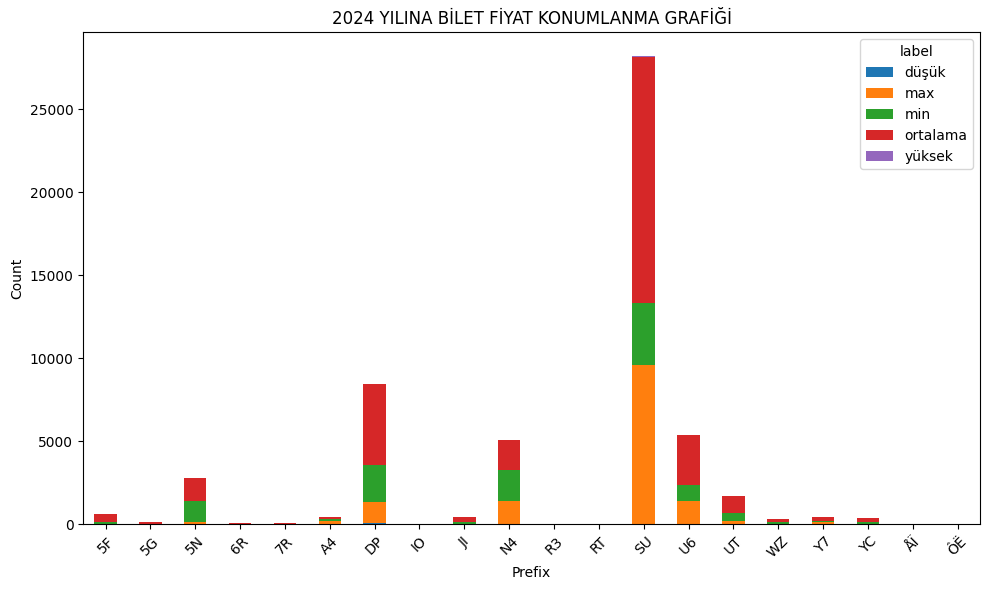

(label   düşük   max   min  ortalama  yüksek
 Prefix                                     
 5F          3    13   120       480       0
 5G          2     6     0       120       0
 5N         15   133  1249      1410       0
 6R          2     6    30        37       1
 7R          1    45     0        24       0
 A4          0   185   147       129       0
 DP         75  1292  2223      4861       8
 IO          0     0     0         1       0
 JI          0    49    84       304       0
 N4         36  1359  1888      1803       1
 R3          0     3     5        30       0
 RT          0     3     1        12       0
 SU         31  9536  3783     14771      90
 U6         30  1363   992      2990       1
 UT         12   192   502      1027       1
 WZ          0    49    81       207       1
 Y7          3   129    80       241       0
 YC          0    14   114       239       0
 ÅÏ          1     1     4        34       0
 ÔË          1     0     4        14       0,
 None)

In [96]:
import matplotlib.pyplot as plt

# Count each label for every prefix
label_counts = filtered_data_diff.groupby('Prefix')['label'].value_counts().unstack(fill_value=0)

# Create a distribution graph
label_counts.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('2024 YILINA BİLET FİYAT KONUMLANMA GRAFİĞİ' )
plt.xlabel('Prefix')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the count table and the graph
label_counts, plt.show()


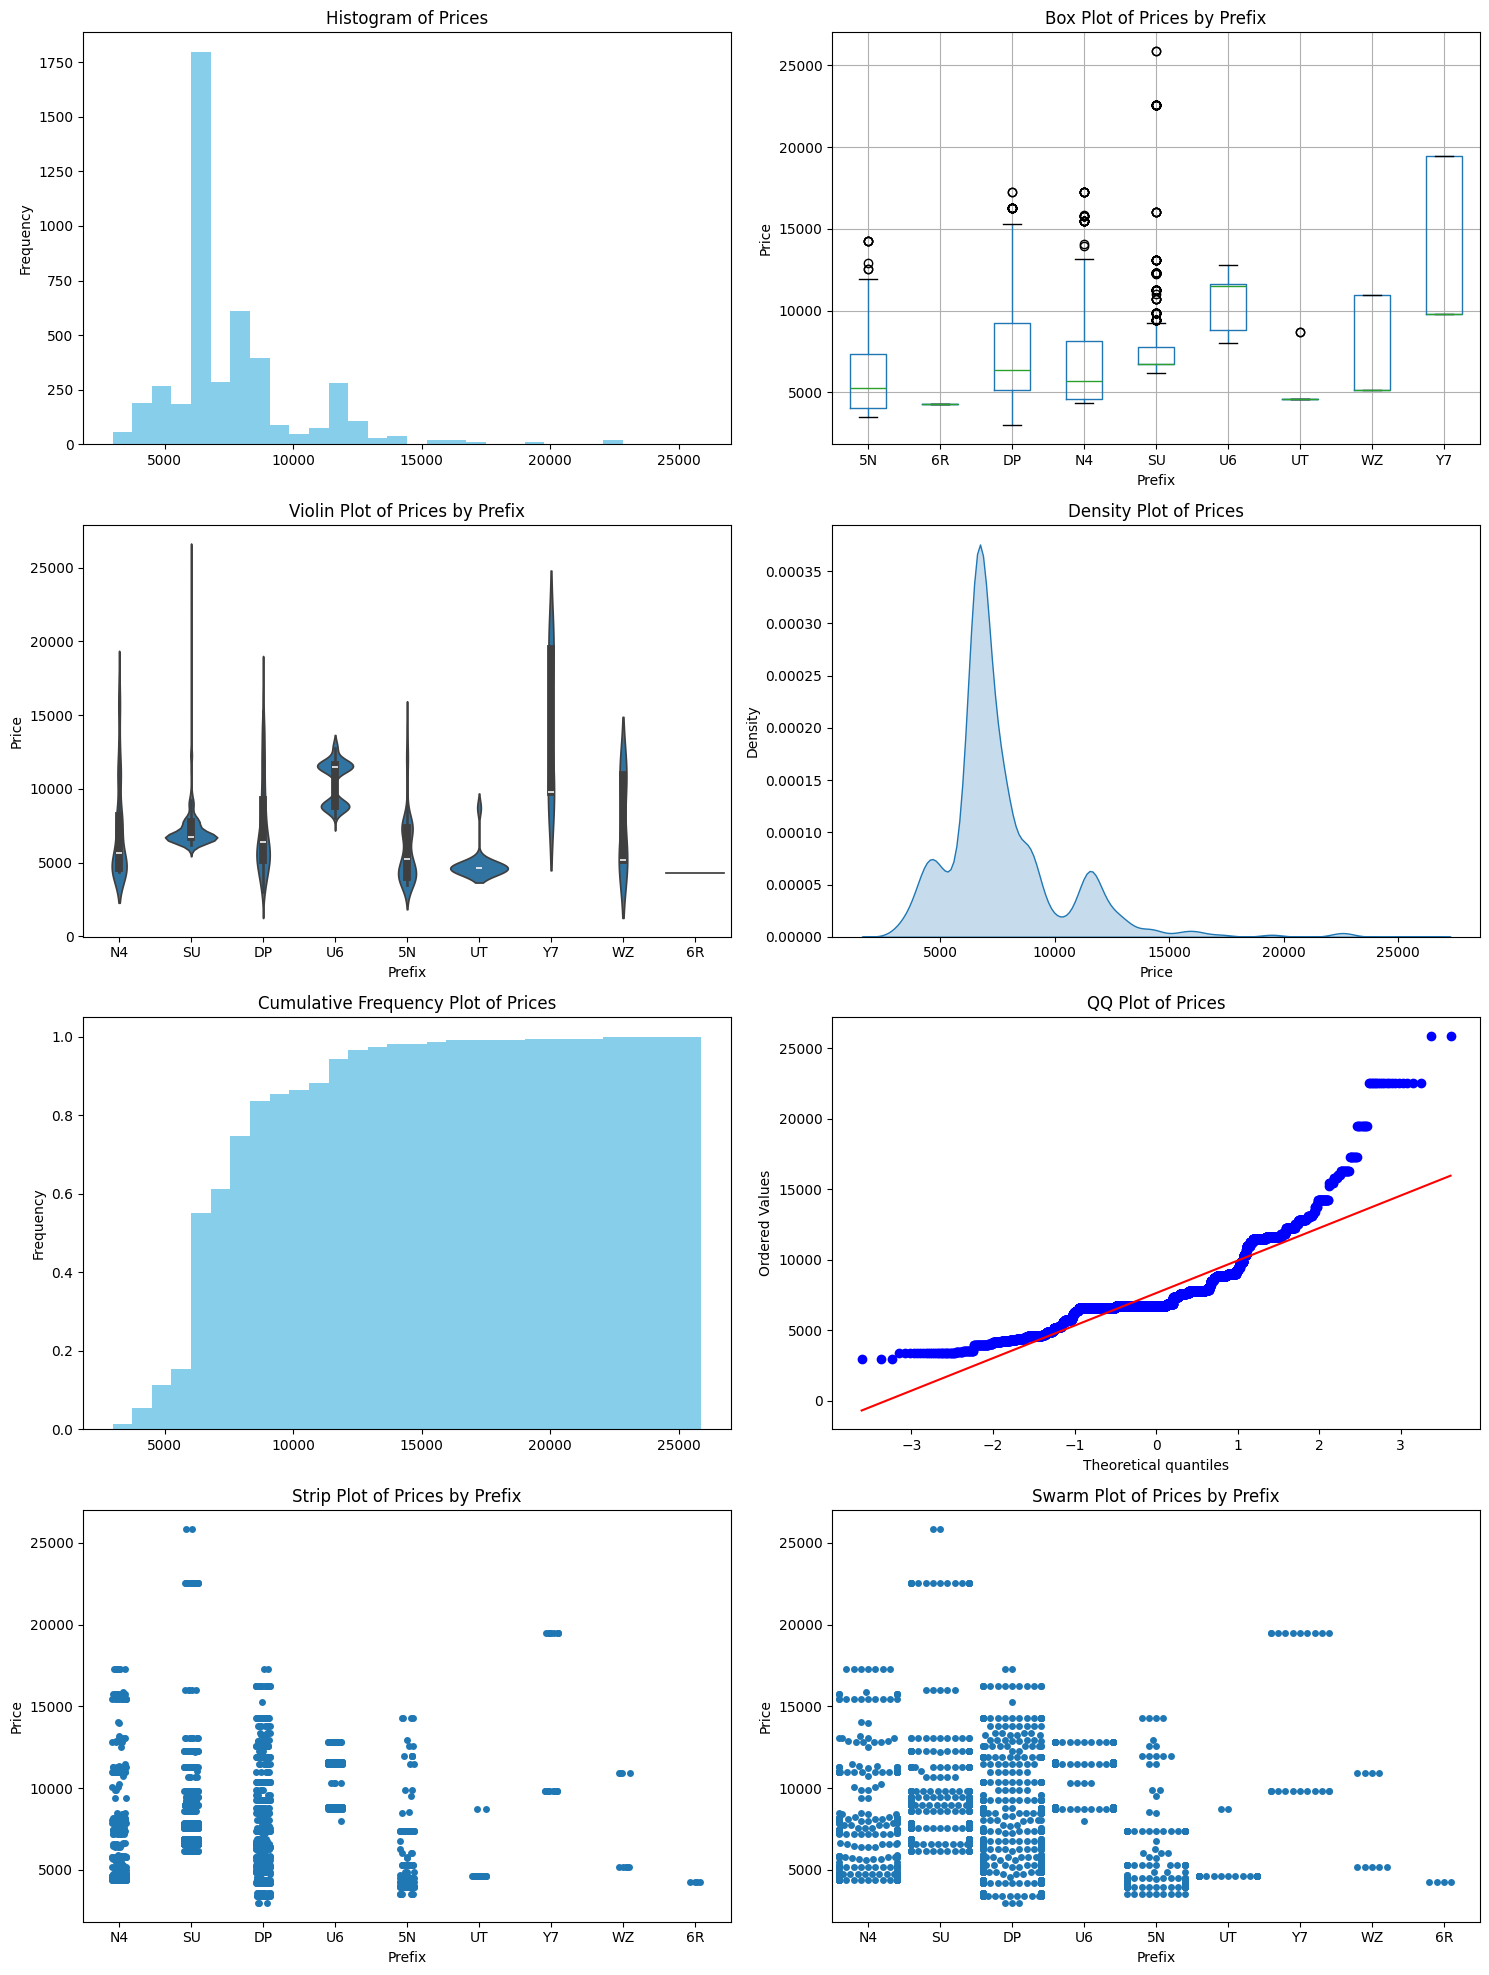

In [27]:
# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))

# Histogram
filtered_data_diff['Price'].plot(kind='hist', ax=axes[0, 0], bins=30, color='skyblue')
axes[0, 0].set_title('Histogram of Prices')

# Box Plot
filtered_data_diff.boxplot(column='Price', by='Prefix', ax=axes[0, 1])
axes[0, 1].set_title('Box Plot of Prices by Prefix')
axes[0, 1].set_xlabel('Prefix')
axes[0, 1].set_ylabel('Price')
plt.suptitle('')  # Suppress the automatic title to avoid overlapping with the subplot title

# Violin Plot
import seaborn as sns
sns.violinplot(x='Prefix', y='Price', data=filtered_data_diff, ax=axes[1, 0])
axes[1, 0].set_title('Violin Plot of Prices by Prefix')

# Density Plot
sns.kdeplot(data=filtered_data_diff['Price'], ax=axes[1, 1], shade=True)
axes[1, 1].set_title('Density Plot of Prices')

# Cumulative Frequency Plot
filtered_data_diff['Price'].plot(kind='hist', cumulative=True, density=True, bins=30, ax=axes[2, 0], color='skyblue')
axes[2, 0].set_title('Cumulative Frequency Plot of Prices')

# QQ Plot
import scipy.stats as stats
stats.probplot(filtered_data_diff['Price'], dist="norm", plot=axes[2, 1])
axes[2, 1].set_title('QQ Plot of Prices')

# Bean Plot / Strip Plot / Swarm Plot
sns.stripplot(x='Prefix', y='Price', data=filtered_data_diff, ax=axes[3, 0])
axes[3, 0].set_title('Strip Plot of Prices by Prefix')

sns.swarmplot(x='Prefix', y='Price', data=filtered_data_diff, ax=axes[3, 1])
axes[3, 1].set_title('Swarm Plot of Prices by Prefix')

# Adjust layout
plt.tight_layout()
plt.show()


In [19]:
merged_data_with_sorted.to_csv("data3.csv", index=False)  # "index=False" to avoid exporting the row index

In [12]:
# Ensure 'Dep_Date' is in datetime format
grouped_data_sorted['Dep_Date'] = pd.to_datetime(grouped_data_sorted['Dep_Date'])

# Extract month and day of week from 'Dep_Date' and create new columns in the DataFrame
grouped_data_sorted['Dep_Month'] = grouped_data_sorted['Dep_Date'].dt.month
grouped_data_sorted['Dep_DayOfWeek'] = grouped_data_sorted['Dep_Date'].dt.day_name()

# Display the first few rows of the dataframe to confirm the new columns are added
grouped_data_sorted.head()


,Dep_Date,ond,Prefix,Number,coll_date,Price,Dep_Month,Dep_DayOfWeek
0,2024-10-10,AER-CEK,U6,619,2023-11-25,12800,10,Thursday
1,2024-10-10,AER-CEK,U6,619,2023-11-28,12800,10,Thursday
2,2024-10-10,AER-CEK,U6,619,2023-12-02,12800,10,Thursday
3,2024-10-10,AER-CEK,U6,619,2023-12-05,12800,10,Thursday
4,2024-10-10,AER-CEK,U6,619,2023-12-07,12800,10,Thursday


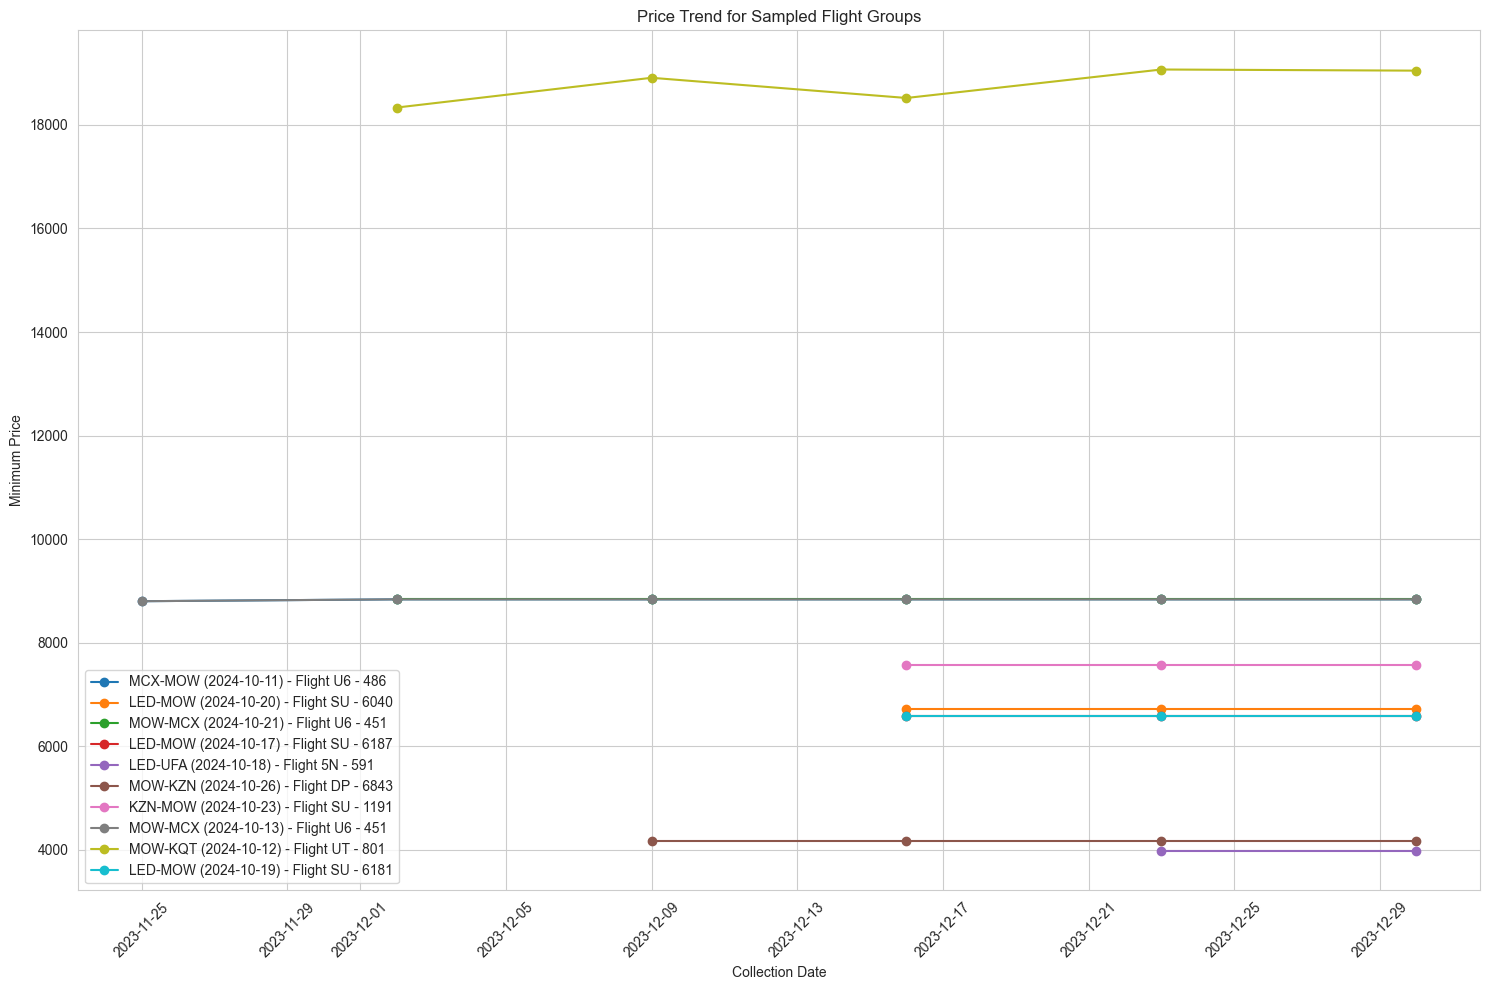

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Sample a few groups to visualize
sampled_groups = grouped_data_sorted.groupby(['Dep_Date', 'ond', 'Prefix', 'Number']).apply(lambda x: x.name).sample(10)

# Initialize the plot
plt.figure(figsize=(15, 10))

# Loop through the sampled groups and plot each one
for group in sampled_groups:
    # Filter data for the current group
    group_data = grouped_data_sorted[(grouped_data_sorted['Dep_Date'] == group[0]) & 
                                     (grouped_data_sorted['ond'] == group[1]) & 
                                     (grouped_data_sorted['Prefix'] == group[2])&
                                     (grouped_data_sorted['Number'] == group[3])]
                                     
    
    # Plotting the price trend for the current group
    plt.plot(group_data['coll_date'], group_data['Price'], marker='o', label=f'{group[1]} ({group[0].strftime("%Y-%m-%d")}) - Flight {group[2]} - {group[3]}')

# Configure plot
plt.title('Price Trend for Sampled Flight Groups')
plt.xlabel('Collection Date')
plt.ylabel('Minimum Price')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()


In [14]:
grouped_data_sorted.to_excel("data1.xlsx", index=False)  # "index=False" to avoid exporting the row index

In [18]:
# Compute summary statistics for each flight group
summary_statistics = grouped_data_sorted.groupby(['Dep_Month', 'ond','Prefix', 'Number'])['Price'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

#Display the summary statistics for the first few flight groups
summary_statistics.head()

#summary_statistics.to_excel('summary_statistics.xlsx', index = False)


,Dep_Month,ond,Prefix,Number,mean,median,std,min,max
0,10,AER-BAX,N4,487,14908.454545,14913.0,21.320072,14813,14913
1,10,AER-CEK,5N,815,12570.000000,12570.0,0.000000,12570,12570
2,10,AER-CEK,DP,323,14993.354839,13774.0,1474.425748,12574,17274
3,10,AER-CEK,N4,505,12626.428571,12795.0,466.832376,11495,12855
4,10,AER-CEK,U6,619,12800.000000,12800.0,0.000000,12800,12800


In [17]:
from sklearn.linear_model import LinearRegression
import numpy as np
import datetime

# Re-initialize the trend_analysis_results DataFrame to ensure it's correctly set up
trend_analysis_results = pd.DataFrame(columns=['Dep_Date', 'ond','Prefix', 'Number', 'slope', 'intercept'])

# Linear Regression Model
model = LinearRegression()

# Initialize an empty list to store the trend analysis results
trend_analysis_data = []

# Perform trend analysis for each flight group
for (dep_date, ond, prefix, number), group_data in grouped_data_sorted.groupby(['Dep_Date', 'ond', 'Prefix','Number']):
    # Prepare the data for regression model
    X = group_data['coll_date'].map(datetime.datetime.toordinal).values.reshape(-1, 1)  # Convert dates to ordinal
    y = group_data['Price'].values
    
    # Fit the linear regression model
    model.fit(X, y)
    
    # Extract the slope (coef) and intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # Append the results to the list as a dictionary
    trend_analysis_data.append({
        'Dep_Date': dep_date, 
        'ond': ond, 
        'Prefix': prefix,
        'Number': number, 
        'slope': slope, 
        'intercept': intercept
    })

# Create a DataFrame from the list of dictionaries
trend_analysis_results = pd.DataFrame(trend_analysis_data)

# Display the results for the first few flight groups
trend_analysis_results.head()


,Dep_Date,ond,Prefix,Number,slope,intercept
0,2024-10-10,AER-CEK,U6,619,0.000000,1.280000e+04
1,2024-10-10,AER-KJA,N4,475,0.000000,1.727800e+04
2,2024-10-10,AER-KJA,SU,6876,-51.428571,3.802221e+07
3,2024-10-10,AER-KUF,DP,331,0.000000,1.147400e+04
4,2024-10-10,AER-KZN,DP,337,0.000000,1.427400e+04


In [13]:
trend_analysis_results.to_excel('trend_result.xlsx', index = False)

In [22]:
# Compute summary statistics for each 'ond' and 'Dep_Month' pair
monthly_stats = grouped_data_sorted.groupby(['ond', 'Dep_Month'])['Price'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# Compute summary statistics for each 'ond' and 'Dep_DayOfWeek' pair
dow_stats = grouped_data_sorted.groupby(['ond', 'Dep_DayOfWeek'])['Price'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

# Display the first few rows of the monthly and day of week statistics
monthly_stats.head()


,ond,Dep_Month,mean,median,std,min,max
0,AER-KEJ,10,14317.0,14317.0,0.0,14317,14317
1,BAX-LED,10,10008.0,10008.0,0.0,10008,10008
2,KEJ-AER,10,11917.0,11917.0,0.0,11917,11917
3,KGD-KZN,10,10631.0,10631.0,0.0,10631,10631
4,KGD-MOW,10,5774.0,5774.0,0.0,5774,5774


In [23]:
 dow_stats.head()

,ond,Dep_DayOfWeek,mean,median,std,min,max
0,AER-KEJ,Saturday,14317.0,14317.0,0.0,14317,14317
1,BAX-LED,Sunday,10008.0,10008.0,0.0,10008,10008
2,KEJ-AER,Sunday,11917.0,11917.0,0.0,11917,11917
3,KGD-KZN,Saturday,10631.0,10631.0,0.0,10631,10631
4,KGD-MOW,Saturday,5774.0,5774.0,0.0,5774,5774
